<center> Homework 1</center>
<center> Bianca Zlavog </center>
<center> DATA 515, Spring 2020 </center>

# Data download
We download data on the number of bicycles crossing the Fremont Bridge from the [City of Seattle Fremont Bridge Bicycle Counter](https://data.seattle.gov/Transportation/Fremont-Bridge-Hourly-Bicycle-Counts-by-Month-Octo/65db-xm6k). This contains the daily and hourly counts for bicycles crossing the bridge since the counter began operation in October 2012, through the most recent month. The counts are also split between which sidewalk the bicycles traverse, either the East or West sidewalk. The fields included in this data are:

-`Date`: date of the observation, in the format `MM/DD/YYYY HH:00:00 AM/PM`

-`Fremont Bridge Total`: total number of bikes that crossed the bridge

-`Fremont Bridge East Sidewalk`: number of bikes that crossed the bridge on the east sidewalk

-`Fremont Bridge West Sidewalk`: number of bikes that crossed the bridge on the west sidewalk

We begin by importing all necessary packages, then downloading and saving the raw data.

In [1]:
import csv
import urllib.request
from urllib.request import urlopen
import codecs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Read in Fremont Bridge Bicycle Counter dataset from website, and parse the resulting csv file
ftpstream = urllib.request.urlopen("https://data.seattle.gov/api/views/65db-xm6k/rows.csv")
csvfile = csv.reader(codecs.iterdecode(ftpstream, 'utf-8'))
fremont_bikes = pd.DataFrame(csvfile)

# Save out raw data
fremont_bikes.to_csv("../data/fremont_bikes_data.csv", index = False) 

# Data preparation
We first read the downloaded csv file into a Pandas dataframe, then add several new columns:

-`total_bikes`: total bicycle count including East and West sidewalk counts

-`hour`: hour of the day

-`year`: year of the observation

Finally, we subset the data to the year 2016 for our analysis.

In [3]:
# Read raw data to Pandas dataframe, and display the data
fremont_bikes = pd.read_csv("../data/fremont_bikes_data.csv", header = 1)
fremont_bikes.head()

,Date,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
0,10/03/2012 12:00:00 AM,13.0,4.0,9.0
1,10/03/2012 01:00:00 AM,10.0,4.0,6.0
2,10/03/2012 02:00:00 AM,2.0,1.0,1.0
3,10/03/2012 03:00:00 AM,5.0,2.0,3.0
4,10/03/2012 04:00:00 AM,7.0,6.0,1.0


In [4]:
# Add new columns for total East + Wesk sidewalk counts, and hour and year
fremont_bikes["total_bikes"] = fremont_bikes["Fremont Bridge East Sidewalk"] + fremont_bikes["Fremont Bridge West Sidewalk"]
fremont_bikes["hour"] = pd.DatetimeIndex(fremont_bikes["Date"]).hour 
fremont_bikes["year"] = pd.DatetimeIndex(fremont_bikes["Date"]).year 

In [5]:
# Create a new dataframe for only 2016 data
fremont_bikes_2016 = fremont_bikes[fremont_bikes["year"]==2016]

# Data analysis
Finally, we analyze the hourly bicycle counts data. We look at the average busiest hour of the day across all days in 2016, and plot the number of bicycles crossing the Fremont Bridge in 2016 by hour.

In [6]:
np.mean(fremont_bikes_2016["hour"])

11.5

From this mean, we see that the busiest time for bicycles crossing the bridge is between 11:00 AM and 12:00 AM.

In [7]:
# Sum up the total number of bicycles by hour
# fremont_bikes_2016_hourly = fremont_bikes_2016.groupby(['hour'], as_index=False).sum()
# Create a column in thousands for neater plotting
# fremont_bikes_2016_hourly["total_bikes_thous"] = fremont_bikes_2016_hourly["total_bikes"] / 1000

# Take the average number of bicycles crossing the bridge by hour across all days in 2016
fremont_bikes_2016_hourly = fremont_bikes_2016.groupby(['hour'], as_index=False).mean()
fremont_bikes_2016_hourly.head()

,hour,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk,total_bikes,year
0,0,10.683060,4.666667,6.016393,10.683060,2016
1,1,5.532787,2.478142,3.054645,5.532787,2016
2,2,3.465753,1.443836,2.021918,3.465753,2016
3,3,2.133880,1.046448,1.087432,2.133880,2016
4,4,6.120219,3.338798,2.781421,6.120219,2016


In [10]:
# Identify the hour with the highest average bicycle traffic
bikes_max = np.max(fremont_bikes_2016_hourly["total_bikes"])
fremont_bikes_2016_hourly[fremont_bikes_2016_hourly["total_bikes"]==bikes_max]

,hour,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk,total_bikes,year
17,17,399.032787,115.483607,283.54918,399.032787,2016


From this calculation, we can see that the average busiest hour is hour 17, or around 5PM.

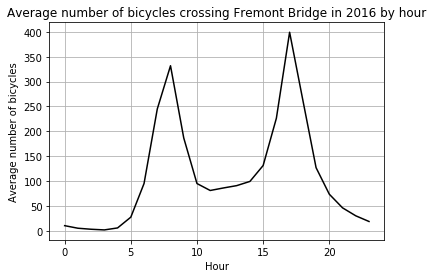

In [8]:
# Plot the time series by hour of total bicycles
plt.plot('hour', 'total_bikes', data=fremont_bikes_2016_hourly, color='black', label='total bikes')

# Label axes, create legend, and format the figure
plt.ylabel('Average number of bicycles')
plt.xlabel('Hour')
plt.title('Average number of bicycles crossing Fremont Bridge in 2016 by hour')
plt.grid()
plt.axhline(y=0, color='k', linewidth = 0)

plt.show()

From this figure, we see two major peaks in bicycle traffic across the Fremont Bridge in 2016 around hour 8 or 8:00 AM and hour 17 or 5:00 PM. This likely aligns with peak commuter hours as many cyclists may be commuting to work in the mornings and returning from work in the evenings. At these daily peaks, around 340 and 400 average cyclists crossed the Fremont bridge in 2016. The least frequent time for cyclists crossing the bridge was around 3:00 AM.